In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

csvpath = "Resources\CensusData.csv"

sales_df = pd.DataFrame(pd.read_csv(csvpath))
sales_df.head()

,Year,United States,South,West
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [2]:
csvpath2= "Resources\FedData.csv"
rate_df = pd.DataFrame(pd.read_csv(csvpath2))
rate_df
eff_fed_rate= rate_df.groupby(["Year"]).mean()['Effective Federal Funds Rate'].round(2)
eff_fed_rate_df = pd.DataFrame(eff_fed_rate)
eff_fed_rate_df = eff_fed_rate_df.drop([1954,1955,1956,1957,1958,1959,1960,1961,1962])
eff_fed_rate_df.head()

,Effective Federal Funds Rate
Year,
1963,3.18
1964,3.50
1965,4.07
1966,5.11
1967,4.22


In [3]:
sales_fed_funds_df = pd.merge(sales_df,eff_fed_rate_df, on="Year", how="outer")
sales_fed_funds_df=sales_fed_funds_df.rename(index=str, columns={"Effective Federal Funds Rate":"Fed Funds Rate"})
sales_fed_funds_df.head()

,Year,United States,South,West,Fed Funds Rate
0,1963,560,199,141,3.18
1,1964,565,200,129,3.50
2,1965,575,210,129,4.07
3,1966,461,166,99,5.11
4,1967,487,179,119,4.22


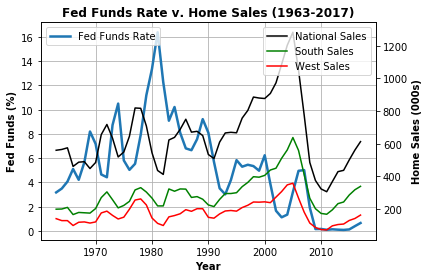

In [16]:
home_sales=[]
south_sales =[]
west_sales = []
for sale in sales_fed_funds_df["United States"]:
    int_sale=int(sale)
    home_sales.append(int_sale)
for sale in sales_fed_funds_df["South"]:
    int_south_sale=int(sale)
    south_sales.append(int_south_sale)
for sale in sales_fed_funds_df["West"]:
    int_west_sale=int(sale)
    west_sales.append(int_west_sale)
fig, ax1=plt.subplots()
x=np.arange(1963,2018)
n=sales_fed_funds_df['Fed Funds Rate']
ax1.plot(x,n,linewidth=2.5)
ax2=ax1.twinx()
ax2.plot(x,home_sales,color="red", label="National Sales")
ax2.plot(x,south_sales,color="g", label="South Sales")
ax2.plot(x,west_sales,color="", label="West Sales")
ax1.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_title('Fed Funds Rate v. Home Sales (1963-2017)',fontweight="bold")
ax1.set_xlabel('Year', fontweight="bold")
ax1.set_ylabel('Fed Funds (%)',fontweight="bold")
ax2.set_ylabel('Home Sales (000s)',fontweight="bold")
plt.savefig('Graph Images/Fed_Funds_Home_Sales2.png')

In [5]:
us_sales_chng = []
south_sales_chng = []
west_sales_chng = []
fed_funds_chng = []
#counter=0
for counter in range(len(sales_fed_funds_df)-1):
    us_sales_chng.append(round((sales_fed_funds_df["United States"][counter+1] / sales_fed_funds_df["United States"][counter]-1)*100,2) )
    south_sales_chng.append(round((sales_fed_funds_df["South"][counter+1] / sales_fed_funds_df["South"][counter]-1)*100,2) )
    west_sales_chng.append(round((sales_fed_funds_df["West"][counter+1] / sales_fed_funds_df["West"][counter]-1)*100,2) )
    fed_funds_chng.append(round((sales_fed_funds_df["Fed Funds Rate"][counter+1] / sales_fed_funds_df["Fed Funds Rate"][counter]-1)*100,2) )
    counter+=1
#us_sales_chng
#south_sales_chng
#fed_funds_chng

In [6]:
year_sub = []
for i in range (len(sales_df)-1):
    year_sub.append(str(sales_df['Year'][i])+ '-' + str(sales_df['Year'][i+1]))
#year_sub    

In [7]:
change_df = pd.DataFrame({"Years": year_sub,
                          "US Sales Change":us_sales_chng,
                          "South Sales Change":south_sales_chng,
                          "West Sales Change":west_sales_chng,
                          "Fed Funds Rate Change":fed_funds_chng})
change_df.set_index('Years')
change_df.head()


,Years,US Sales Change,South Sales Change,West Sales Change,Fed Funds Rate Change
0,1963-1964,0.89,0.50,-8.51,10.06
1,1964-1965,1.77,5.00,0.00,16.29
2,1965-1966,-19.83,-20.95,-23.26,25.55
3,1966-1967,5.64,7.83,20.20,-17.42
4,1967-1968,0.62,-1.12,1.68,34.12


In [8]:
change_df.corr()

,US Sales Change,South Sales Change,West Sales Change,Fed Funds Rate Change
US Sales Change,1.000000,0.967980,0.960601,-0.009532
South Sales Change,0.967980,1.000000,0.897788,0.014709
West Sales Change,0.960601,0.897788,1.000000,-0.039440
Fed Funds Rate Change,-0.009532,0.014709,-0.039440,1.000000


In [9]:
sales_fed_funds_df.corr()

,Year,United States,South,West,Fed Funds Rate
Year,1.000000,0.157559,0.420334,0.143382,-0.569535
United States,0.157559,1.000000,0.941071,0.977481,-0.040764
South,0.420334,0.941071,1.000000,0.893617,-0.135304
West,0.143382,0.977481,0.893617,1.000000,-0.003449
Fed Funds Rate,-0.569535,-0.040764,-0.135304,-0.003449,1.000000


In [10]:
sales_pre_TwoK = sales_fed_funds_df[0:42]
sales_pre_TwoK.corr()


,Year,United States,South,West,Fed Funds Rate
Year,1.000000,0.703568,0.796824,0.705846,-0.213845
United States,0.703568,1.000000,0.963253,0.970803,-0.508949
South,0.796824,0.963253,1.000000,0.918262,-0.372366
West,0.705846,0.970803,0.918262,1.000000,-0.439001
Fed Funds Rate,-0.213845,-0.508949,-0.372366,-0.439001,1.000000


In [11]:
sales_post_TwoK= sales_fed_funds_df[42:55]
sales_post_TwoK.corr()

,Year,United States,South,West,Fed Funds Rate
Year,1.000000,-0.548929,-0.508981,-0.506648,-0.723199
United States,-0.548929,1.000000,0.996800,0.993964,0.796381
South,-0.508981,0.996800,1.000000,0.987521,0.802611
West,-0.506648,0.993964,0.987521,1.000000,0.730706
Fed Funds Rate,-0.723199,0.796381,0.802611,0.730706,1.000000
